Unimanual reaching to different directions (0, 60, etc) could be different due to different factors -- e.g., reaching to 300 could be curvier/slower/.. than reaching to 0. Or the left and right hands could be systematically different. So, we must first characterize these baseline performances. Reaching with the other hand could also affect these force trajectories. If there is an interference between the reaching of the two hands, the performance will be worse than unimanual for both hands. 

Therefore, I hypothesize that if the reaching directions are 'mathced' or 'mirrored' there won't be a lot of differences. However, if the reaching directions are unmatched, there will be differences compared to unimanual condition. 

Observing the raw raeching trajectories is the first step to gain such insight.

In [1]:
import os
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/AnatSearchlight')
sys.path.append('/Users/aghavamp/Desktop/Projects/SUITPy')

from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')
figDir = os.path.join(baseDir,'figures')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}



## Force trajectories for all 48 conditions - TRAINING

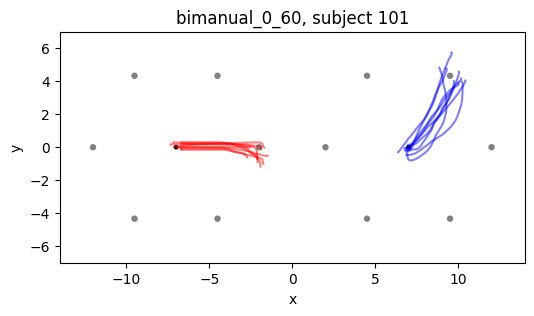

In [4]:
sn_list = [101, 102, 103, 104, 106, 107, 108]
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_train.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_train_mov.csv'))

    conds = D.cond_name.unique()
    left_conds = [cond for cond in conds if 'left_' in cond]
    right_conds = [cond for cond in conds if 'right_' in cond]

    for cond in conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        
        # plot kinematic traces for left and right hands:
        fix, ax = plt.subplots(figsize=(6, 3))
        utils.please.draw_board(ax=ax)
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
            radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
            angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
            angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]
            
            radius = 5
            x_offset = radius+2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            plt.plot(x_l, y_l, color='red', alpha=0.5)
            plt.plot(x_r, y_r, color='blue', alpha=0.5)
        plt.title(f'{cond}, subject {sn}')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_xlim(-14, 14)
        ax.set_ylim(-7, 7)
        plt.savefig(os.path.join(figDir, 'reach_trajectories', 'train', f'{cond}_s{sn}.pdf'), bbox_inches="tight")
        if cond == 'bimanual_0_60' and sn==101: # show for one of the conditions as an example
            plt.show()
        else:
            plt.close()

## Force trajectories for all 48 conditions - SCAN

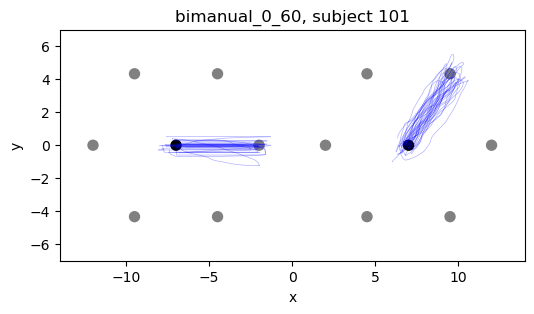

In [4]:
sn_list = [101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_scan.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_scan_mov.csv'))

    conds = D.cond_name.unique()
    left_conds = [cond for cond in conds if 'left_' in cond]
    right_conds = [cond for cond in conds if 'right_' in cond]

    for cond in conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        
        # plot kinematic traces for left and right hands:
        fix, ax = plt.subplots(figsize=(6, 3))
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:]#idx_endReach]
            radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:]#idx_endReach]
            angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:]#idx_endReach]
            angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:]#idx_endReach]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            plt.plot(x_l, y_l, color='b', alpha=0.3, lw=0.5)
            plt.plot(x_r, y_r, color='b', alpha=0.3, lw=0.5)
        
        utils.please.draw_board(ax=ax, radius=5)
        plt.title(f'{cond}, subject {sn}')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_xlim(-14, 14)
        ax.set_ylim(-7, 7)
        plt.savefig(os.path.join(figDir, 'reach_trajectories', 'scan', f'{cond}_s{sn}.pdf'), bbox_inches="tight")
        if cond == 'bimanual_60_180' and sn==101: # show for one of the conditions as an example
            plt.show()
        else:
            plt.close()


